In [3]:
import pandas as pd
import numpy as np
import warnings
from pathlib import Path
warnings.filterwarnings('ignore')

* dataset : https://www.kaggle.com/datasets/rashadrmammadov/heart-disease-prediction

In [54]:
df = pd.read_csv("../data/raw/heart_disease_dataset.csv", sep=",")
df.head(10)

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0
5,77,Male,309,110,73,Never,NaN,0,No,Yes,Yes,4,122,Yes,Asymptomatic,1
6,64,Female,211,105,86,Former,Heavy,8,Yes,Yes,Yes,2,120,No,Typical Angina,1
7,60,Female,208,148,83,Never,Moderate,4,No,Yes,Yes,2,113,Yes,Asymptomatic,1
8,37,Female,317,137,66,Current,Heavy,3,No,Yes,Yes,5,114,No,Non-anginal Pain,0
9,63,Male,204,141,68,Former,Heavy,8,No,Yes,No,3,107,No,Asymptomatic,1


In [55]:
print("\nStatistiques descriptives:")
df.describe()


Statistiques descriptives:


,Age,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Stress Level,Blood Sugar,Heart Disease
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,52.293000,249.939000,135.2810,79.204000,4.529000,5.646000,134.941000,0.392000
std,15.727126,57.914673,26.3883,11.486092,2.934241,2.831024,36.699624,0.488441
min,25.000000,150.000000,90.0000,60.000000,0.000000,1.000000,70.000000,0.000000
25%,39.000000,200.000000,112.7500,70.000000,2.000000,3.000000,104.000000,0.000000
50%,52.000000,248.000000,136.0000,79.000000,4.500000,6.000000,135.000000,0.000000
75%,66.000000,299.000000,159.0000,89.000000,7.000000,8.000000,167.000000,1.000000
max,79.000000,349.000000,179.0000,99.000000,9.000000,10.000000,199.000000,1.000000


<br>
<br>
<hr>

#### __*- Analyse Exploratoire*__

<br>

__*- Vérification des valeurs manquantes*__

In [56]:
compte_manquant = df.isnull().sum()
pct_manquant = (compte_manquant / len(df) * 100).round(2)


resume_manquants = pd.DataFrame({
    "Valeur manquante": compte_manquant,
    "Pourcentage (%)": pct_manquant
})

resume_manquants = resume_manquants.sort_values("Pourcentage (%)", ascending=False)
resume_manquants.head(30)

,Valeur manquante,Pourcentage (%)
Alcohol Intake,340,34.0
Age,0,0.0
Cholesterol,0,0.0
Gender,0,0.0
Blood Pressure,0,0.0
Heart Rate,0,0.0
Smoking,0,0.0
Exercise Hours,0,0.0
Family History,0,0.0
Diabetes,0,0.0



<br>

__*- Vérification des doublons*__

In [57]:
doublons = df.duplicated().sum()
print(f"Nombre de doublons : {doublons}")

# Supprimer les doublons si présents
if doublons > 0:
    df = df.drop_duplicates()
    print(f"Après suppression : {df.shape}")

Nombre de doublons : 0


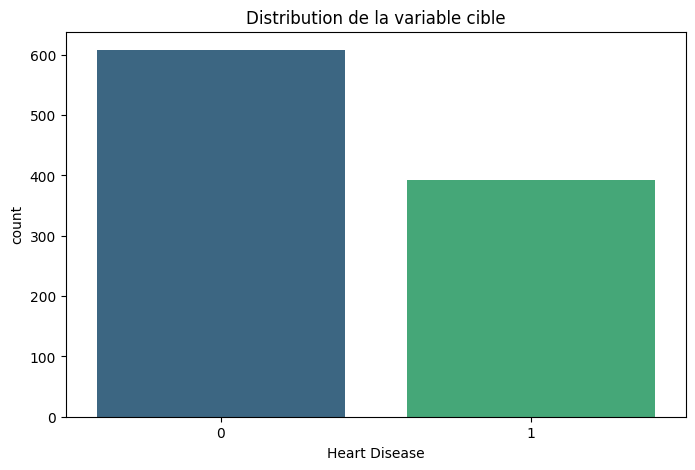

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Heart Disease', palette='viridis')
plt.title('Distribution de la variable cible')
plt.show()

In [59]:
# Vérifie le déséquilibre des colonnes catégorielles.
def verifier_desequilibre(df, seuil=0.2):
    cols_cat = df.select_dtypes(include=['object']).columns.tolist()
    resultats = []

    for col in cols_cat:
        counts = df[col].value_counts()
        ratio_min = counts.min() / counts.sum()
        resultats.append({
            'colonne': col,
            'nb_classes': len(counts),
            'classe_majoritaire': counts.idxmax(),
            'classe_minoritaire': counts.idxmin(),
            'ratio_minoritaire': f"{ratio_min:.2%}"
        })
    return pd.DataFrame(resultats)



verifier_desequilibre(df)

,colonne,nb_classes,classe_majoritaire,classe_minoritaire,ratio_minoritaire
0,Gender,2,Female,Male,49.70%
1,Smoking,3,Never,Former,32.60%
2,Alcohol Intake,2,Heavy,Moderate,47.58%
3,Family History,2,No,Yes,49.90%
4,Diabetes,2,Yes,No,49.50%
5,Obesity,2,No,Yes,49.90%
6,Exercise Induced Angina,2,No,Yes,47.20%
7,Chest Pain Type,4,Non-anginal Pain,Atypical Angina,24.60%


<br>
<br>
<hr>

#### __*- Séparer target et features*__

In [61]:
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']


#### __*- Identifier les colonnes catégorielles*__

In [62]:
cols_categorielles = X.select_dtypes(include='object').columns.tolist()
cols_numeriques = X.select_dtypes(include=[np.number]).columns.tolist()


print(f"Colonnes numériques ({len(cols_numeriques)}): {cols_numeriques}")
print(f"Colonnes catégorielles ({len(cols_categorielles)}): {cols_categorielles}")

Colonnes numériques (7): ['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Exercise Hours', 'Stress Level', 'Blood Sugar']
Colonnes catégorielles (8): ['Gender', 'Smoking', 'Alcohol Intake', 'Family History', 'Diabetes', 'Obesity', 'Exercise Induced Angina', 'Chest Pain Type']


In [63]:
from sklearn.preprocessing import LabelEncoder


if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)


<br>
<br>
<hr>

#### __*- SPLIT TRAIN / TEST*__





In [64]:
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"\nTrain : {len(X_train)} échantillons")
print(f"Test : {len(X_test)} échantillons")


Train : 800 échantillons
Test : 200 échantillons


In [65]:
X_train.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type
634,45,Female,162,108,85,Current,Heavy,3,Yes,No,Yes,7,112,Yes,Non-anginal Pain
730,76,Male,253,128,78,Current,Moderate,4,Yes,Yes,No,8,182,Yes,Typical Angina
893,27,Female,246,160,75,Never,NaN,2,No,Yes,Yes,5,94,No,Typical Angina
688,26,Male,157,176,67,Current,Moderate,4,No,Yes,No,8,165,No,Typical Angina
27,63,Male,273,103,64,Never,NaN,6,Yes,Yes,Yes,9,104,No,Typical Angina


<br>
<br>
<hr>

#### __*- PREPROCESSING SUR TRAIN*__

<br>

__*- Imputer les valeurs manquantes sur les variables numériques et catégorielles*__

In [67]:
from sklearn.impute import SimpleImputer




def imputer_nan(X_train, X_test, cols_numeriques):
    X_train_imputed = X_train.copy()
    X_test_imputed = X_test.copy()

    imputer = SimpleImputer(strategy='mean')
    X_train_imputed[cols_numeriques] = imputer.fit_transform(X_train[cols_numeriques])
    X_test_imputed[cols_numeriques] = imputer.transform(X_test[cols_numeriques])

    return X_train_imputed, X_test_imputed



X_train_imputed, X_test_imputed = imputer_nan(
    X_train, X_test, cols_numeriques
)



X_train_imputed.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type
634,45.0,Female,162.0,108.0,85.0,Current,Heavy,3.0,Yes,No,Yes,7.0,112.0,Yes,Non-anginal Pain
730,76.0,Male,253.0,128.0,78.0,Current,Moderate,4.0,Yes,Yes,No,8.0,182.0,Yes,Typical Angina
893,27.0,Female,246.0,160.0,75.0,Never,NaN,2.0,No,Yes,Yes,5.0,94.0,No,Typical Angina
688,26.0,Male,157.0,176.0,67.0,Current,Moderate,4.0,No,Yes,No,8.0,165.0,No,Typical Angina
27,63.0,Male,273.0,103.0,64.0,Never,NaN,6.0,Yes,Yes,Yes,9.0,104.0,No,Typical Angina


<br>

__*- Encoder les variables catégorielles*__

In [68]:
from sklearn.preprocessing import LabelEncoder






def encoder_variables_categorielles(X_train, X_test, cols_categorielles):
    X_train_encoded = X_train.copy()
    X_test_encoded = X_test.copy()
    label_encoders = {}

    for col in cols_categorielles:
        label_encoders[col] = LabelEncoder()
        X_train_encoded[col] = label_encoders[col].fit_transform(X_train[col])
        X_test_encoded[col] = label_encoders[col].transform(X_test[col])

    return X_train_encoded, X_test_encoded, label_encoders




X_train_encoded, X_test_encoded, label_encoders = encoder_variables_categorielles(
    X_train_imputed, X_test_imputed, cols_categorielles
)

X_train_encoded.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type
634,45.0,0,162.0,108.0,85.0,0,0,3.0,1,0,1,7.0,112.0,1,2
730,76.0,1,253.0,128.0,78.0,0,1,4.0,1,1,0,8.0,182.0,1,3
893,27.0,0,246.0,160.0,75.0,2,2,2.0,0,1,1,5.0,94.0,0,3
688,26.0,1,157.0,176.0,67.0,0,1,4.0,0,1,0,8.0,165.0,0,3
27,63.0,1,273.0,103.0,64.0,2,2,6.0,1,1,1,9.0,104.0,0,3


<br>

__*- Normalisation des variables numériques*__

In [74]:
from sklearn.preprocessing import StandardScaler




def scale_numeriques(X_train, X_test, num_cols):

    scaler = StandardScaler()
    scaler.fit(X_train[num_cols])

    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()

    X_train_scaled[num_cols] = scaler.transform(X_train[num_cols])
    X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])
    return X_train_scaled, X_test_scaled, scaler



X_train_scaled, X_test_scaled, scaler = scale_numeriques(
    X_train_encoded, X_test_encoded, cols_numeriques
)

X_train_scaled.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type
634,-0.467117,0,-1.499953,-1.063988,0.483258,0,0,-0.489909,1,0,1,0.488877,-0.644776,1,2
730,1.521298,1,0.065185,-0.302092,-0.126257,0,1,-0.152622,1,1,0,0.845722,1.263551,1,3
893,-1.621681,0,-0.055210,0.916942,-0.387477,2,2,-0.827196,0,1,1,-0.224812,-1.135488,0,3
688,-1.685823,1,-1.585950,1.526459,-1.084065,0,1,-0.152622,0,1,0,0.845722,0.800100,0,3
27,0.687446,1,0.409172,-1.254462,-1.345285,2,2,0.521952,1,1,1,1.202567,-0.862870,0,3


<br>
<br>
<hr>

#### __*- ENTRAÎNEMENT*__

In [47]:
"""

from imblearn.over_sampling import SMOTE

# Appliquer SMOTE sur les données d'entraînement
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

"""

"\n\nfrom imblearn.over_sampling import SMOTE\n\n# Appliquer SMOTE sur les données d'entraînement\nsmote = SMOTE(random_state=42)\nX_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)\n\n"

In [73]:
'''

from imblearn.combine import SMOTETomek, SMOTEENN


smotetomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smotetomek.fit_resample(X_train_scaled, y_train)
'''


'\n\nfrom imblearn.combine import SMOTETomek, SMOTEENN\n\n\nsmotetomek = SMOTETomek(random_state=42)\nX_train_resampled, y_train_resampled = smotetomek.fit_resample(X_train_scaled, y_train)\n'

<br>

__*- Créer les modèles avec PIPELINE*__

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report





model_log = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    solver='liblinear',
    random_state=42
)
model_log.fit( X_train_scaled, y_train)


y_pred_LogisticRec = model_log.predict(X_test_scaled)
y_proba_LogisticRec = model_log.predict_proba(X_test_scaled)[:, 1]

print(f"Accuracy: {accuracy_score(y_test, y_pred_LogisticRec):.2%}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_LogisticRec):.2%}")
print(f"\nClassification Report:\n{classification_report(y_test, y_pred_LogisticRec)}")

Accuracy: 83.50%
ROC-AUC: 95.24%

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       122
           1       0.77      0.82      0.80        78

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.84      0.83      0.84       200



In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import randint


parametres = {
    "n_estimators": randint(100, 400),
    "max_depth": randint(5, 20),
    "min_samples_split": randint(2, 10),
    "min_samples_leaf": randint(1, 10),
    "max_features": ["sqrt", "log2"],
    "bootstrap": [True, False]
}


cv_stratifiee = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

recherche = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=parametres,
    n_iter=30,
    cv=cv_stratifiee,
    verbose=1,
    n_jobs=-1,
    random_state=42,
    scoring='roc_auc'
)



recherche.fit(X_train_scaled, y_train)
print(f"\nMeilleurs paramètres: {recherche.best_params_}")


model_rf = recherche.best_estimator_

y_pred_rf = model_rf.predict(X_test_scaled)
y_proba_rf = model_rf.predict_proba(X_test_scaled)[:, 1]

print(f"\nAccuracy RF: {accuracy_score(y_test, y_pred_rf):.2%}")
print(f"ROC-AUC RF: {roc_auc_score(y_test, y_proba_rf):.2%}")
print(f"\n{classification_report(y_test, y_pred_rf)}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits

Meilleurs paramètres: {'bootstrap': True, 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'min_samples_split': 4, 'n_estimators': 187}

Accuracy RF: 99.00%
ROC-AUC RF: 100.00%

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       122
           1       1.00      0.97      0.99        78

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



In [80]:
import xgboost as xgb



model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model_xgb.fit( X_train_scaled, y_train)
y_pred_xgb = model_xgb.predict(X_test_scaled)
y_proba_xgb = model_xgb.predict_proba(X_test_scaled)[:, 1]



print(f"\nAccuracy XGBoost: {accuracy_score(y_test, y_pred_xgb):.2%}")
print(f"ROC-AUC XGBoost: {roc_auc_score(y_test, y_proba_xgb):.2%}")
print(f"\n{classification_report(y_test, y_pred_xgb)}")


Accuracy XGBoost: 100.00%
ROC-AUC XGBoost: 100.00%

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00        78

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [23]:
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


def cross_val_mean(model, X, y, cv=5, scoring='f1'):
    """
    Calcule le score moyen de validation croisée pour un modèle

        - Parameters:
            model: Modèle sklearn à évaluer
            X: Features
            y: Target
            cv: Nombre de folds
            scoring: Métrique d'évaluation

            Returns:
        f      loat: Score moyen de la validation croisée
    """

    scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
    return scores.mean()





# Pipelines avec SMOTE intégré pour cross-validation
pipeline_log = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', LogisticRegression(max_iter=500))
])

pipeline_rf = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', model_rf)
])

In [24]:
mean_f1_log = cross_val_mean(pipeline_log, X_train_scaled, y_train, cv=5, scoring='f1')
mean_f1_rf = cross_val_mean(pipeline_rf, X_train_scaled, y_train, cv=5, scoring='f1')

print(f"\nF1-score moyen Logistic Regression: {mean_f1_log:.2%}")
print(f"F1-score moyen Random Forest: {mean_f1_rf:.2%}")


F1-score moyen Logistic Regression: 25.03%
F1-score moyen Random Forest: 17.32%


In [25]:
def meilleur_modele(models_dict, X, y, cv=5, scoring='f1'):
    """
    Trouve le meilleur modèle basé sur le score de validation croisée
    """
    meilleur_score = 0
    meilleur_modele = None
    meilleur_nom = ""

    for nom, model in models_dict.items():
        score = cross_val_mean(model, X, y, cv=cv, scoring=scoring)
        print(f"{nom}: {score:.2%}")

        if score > meilleur_score:
            meilleur_score = score
            meilleur_modele = model
            meilleur_nom = nom

    print(f"\n🎯 Meilleur modèle: {meilleur_nom} avec un score de {meilleur_score:.2%}")
    return meilleur_modele, meilleur_nom, meilleur_score




models = {
    'Logistic Regression': model_log,
    'Random Forest': model_rf
}

meilleur_model, nom_meilleur, score_meilleur = meilleur_modele(
    models, X_train_balanced, y_train_balanced, cv=5, scoring='f1'
)

Logistic Regression: 55.92%
Random Forest: 76.61%

🎯 Meilleur modèle: Random Forest avec un score de 76.61%


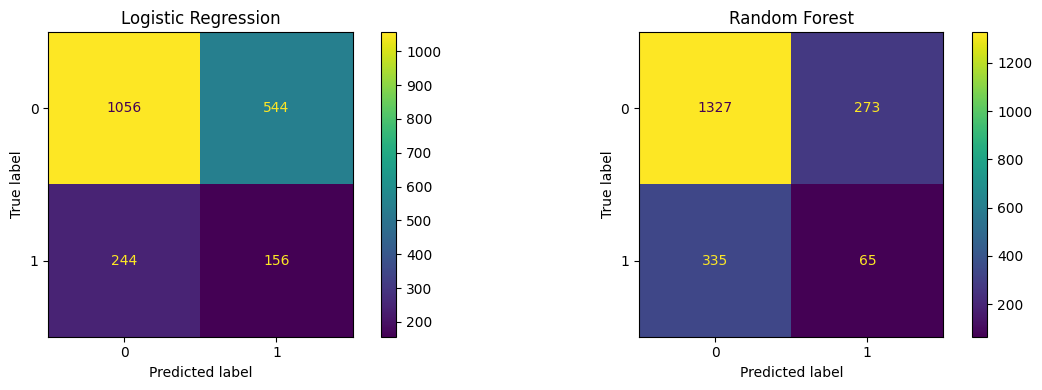

In [ ]:

from sklearn.metrics import ConfusionMatrixDisplay



fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Logistic Regression
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_LogisticRec, ax=axes[0])
axes[0].set_title('Logistic Regression')

# Random Forest
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, ax=axes[1])
axes[1].set_title('Random Forest')

plt.tight_layout()
plt.show()

<br>


__*- Sauvegarder le meilleur modèle*__

In [26]:
import joblib

# Sauvegarder le meilleur modèle
joblib.dump(meilleur_model, '../notebooks/best_models/best_model.pkl')

['../notebooks/best_models/best_model.pkl']

<br>
<br>
<hr>

#### __*- Démonstration des Prédictions par le meilleur modèle*__

In [58]:
import joblib

model = joblib.load('../models/best_models/best_model.pkl')

# Réinitialiser les index
X_test_reset = X_test_scaled.reset_index(drop=True)
y_test_reset = np.array(y_test)

np.random.seed(42)
indices = np.random.choice(len(X_test_reset), 5, replace=False)

print("=" * 50)
print("🏥 DÉMONSTRATION - 5 patients")
print("=" * 50)

for i, idx in enumerate(indices):
    patient = X_test_reset.iloc[[idx]]
    pred = model.predict(patient)[0]
    proba = model.predict_proba(patient)[0][1]
    vrai = y_test_reset[idx]
    
    print(f"\nPatient {i+1}:")
    print(f"  {'🔴 Maladie' if pred == 1 else '🟢 Sain'} (Proba: {proba:.1%})")
    print(f"  Réalité: {'Maladie' if vrai == 1 else 'Sain'}")
    print(f"  {'✅' if pred == vrai else '❌'}")

🏥 DÉMONSTRATION - 5 patients

Patient 1:
  🔴 Maladie (Proba: 53.3%)
  Réalité: Sain
  ❌

Patient 2:
  🟢 Sain (Proba: 30.1%)
  Réalité: Maladie
  ❌

Patient 3:
  🟢 Sain (Proba: 19.7%)
  Réalité: Sain
  ✅

Patient 4:
  🟢 Sain (Proba: 45.7%)
  Réalité: Sain
  ✅

Patient 5:
  🟢 Sain (Proba: 21.1%)
  Réalité: Sain
  ✅
